In [1]:
from qiskit import *
#IBMQ.save_account('TOKEN_AQUI')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
#Check IBM servers available
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
#Check IBM Servers queue and status
for backend in provider.backends():
    print( backend.status() )

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.1.0', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=6, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=24, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=11, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=6, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=6, status_msg='active')
BackendSt

In [5]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits  >= 4 and
                                                      not x.configuration().simulator and
                                                      x.status().operational==True)
if large_enough_devices != []:
    backend = least_busy(large_enough_devices)
    print("The best backend is " + backend.name())
else:
    print("No device available for input parameters")

AttributeError: 'IBMQFactory' object has no attribute 'backends'

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline

from qiskit import BasicAer

from qiskit.aqua import run_algorithm
from qiskit.aqua.input import EnergyInput
from qiskit.aqua.translators.ising import clique_new
from qiskit.aqua.algorithms import ExactEigensolver

from qiskit.tools.visualization import plot_histogram

[[0. 4. 5. 0. 0.]
 [4. 0. 9. 0. 7.]
 [5. 9. 0. 0. 6.]
 [0. 0. 0. 0. 0.]
 [0. 7. 6. 0. 0.]]
{(0, 1): 4.0, (0, 2): 5.0, (1, 2): 9.0, (1, 4): 7.0, (2, 4): 6.0}


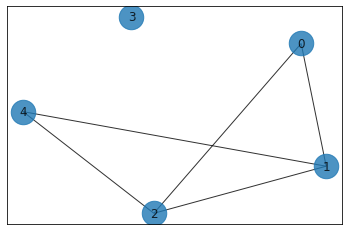

In [14]:
#Start Graph creation and Clique definition
K = 3  # K clique size
np.random.seed(100)
num_nodes = 5 # Graph vertice numbers
adjacency_matrix = clique_new.random_graph(num_nodes, edge_prob=0.55, weight_range=10)
#Print adjacency matrix
print(adjacency_matrix)

G = nx.from_numpy_matrix(np.array(adjacency_matrix)) 
labels = nx.get_edge_attributes(G,'weight')
#Print edges between vertices
print(labels)

pos = nx.spring_layout(G,k=10,scale=10)

#Print result graph
#nx.draw(G, pos, with_labels=True, width=2, style="solid")
#nx.draw_circular(G, with_labels=True)
nx.draw_networkx(G, with_labels=True, node_size=600, alpha = .8, pos=pos)
#nx.draw_planar(G, with_labels=True)
#nx.draw_random(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
#nx.draw_spring(G, with_labels=True)
#nx.draw_shell(G, with_labels=True)


In [15]:
#Code Cell Test - Declarative VQE without Looping
penality=2000
qubit_op, offset = clique_new.get_clique_qubitops_2(adjacency_matrix, K, penality)

algo_input = EnergyInput(qubit_op)

params = {
    'problem': {'name': 'ising'},
    'algorithm': {'name': 'VQE'},
    'optimizer': {'name': 'COBYLA','maxiter': 200},
    'variational_form': {'name': 'RY', 'depth': 5, 'entanglement': 'linear'}
}
backend = BasicAer.get_backend('statevector_simulator')
print("Adjacency Matrix:", adjacency_matrix)
print("Clique(K):", K)

totaltime=0

result = run_algorithm(params, algo_input, backend=backend)
x = clique_new.sample_most_likely(len(adjacency_matrix), result['eigvecs'][0])
ising_vqed_sol = clique_new.get_graph_solution(x)
print("ISING:", ising_vqed_sol)
getclique = clique_new.satisfy_or_not(ising_vqed_sol, adjacency_matrix, K)
totaltime=totaltime+result['eval_time']

print('energy:', result['energy'])
print('time:', totaltime)
print('clique objective:', result['energy'] + offset)
#print('solution:', clique.get_graph_solution(x))

#if getclique:
print("Solution is ", ising_vqed_sol, " for Graph(G) with ", num_nodes, " vertices and a Clique(K): ", K)
#Start lists
ising_vqed_nol1 = []
ising_vqed_nol2 = []
#Create two lists to clique vertice colors
for i in range(num_nodes):
    if ising_vqed_sol[i] != 0:
        ising_vqed_nol1.append(i)
    else:
        ising_vqed_nol2.append(i)

pos=nx.spring_layout(G,k=10,scale=10)
#Red color for clique vertices
nx.draw_networkx_nodes(G,pos,
                       nodelist=ising_vqed_nol1,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#Blue color for not clique vertices
nx.draw_networkx_nodes(G,pos,
                       nodelist=ising_vqed_nol2,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
#Imprimir o grafo com as cliques
nx.draw_networkx_labels(G,pos,with_labels=True)
#else:
#    print("No solution found for K=", K)

ValueError: too many values to unpack (expected 2)

Penalidade:  1000
Adjacency Matrix: [[0. 4. 5. 0. 0.]
 [4. 0. 9. 0. 7.]
 [5. 9. 0. 0. 6.]
 [0. 0. 0. 0. 0.]
 [0. 7. 6. 0. 0.]]
Clique(K): 3
ISING: [0. 1. 1. 0. 1.]
energy: -1501.42
time: 39.84286642074585
clique objective: 0.32999999999992724
optimal_cost: -1501.42
Resultado: {'num_optimizer_evals': 250, 'min_val': -1501.42, 'opt_params': array([ 1.93909501, -3.13276149,  0.75319841,  0.46142828, -3.33266322,
        1.40065792,  0.17265885, -2.04581994,  1.06058642, -3.0393164 ,
       -0.88403334, -2.67528003,  0.1864117 ,  1.09052901,  1.29614857,
        0.12283331,  1.65987506, -1.37767277, -1.62714834, -2.56111463,
        1.41992227, -0.19936818,  0.16224181,  0.16119221,  2.51966437,
        1.34051626,  0.3374834 , -1.29729154,  1.44154753, -1.95341233]), 'eval_time': 39.84286642074585, 'eval_count': 250, 'energy': -1501.42, 'eigvals': array([-1501.42]), 'min_vector': {'01000': 1, '01010': 35, '01001': 62, '10001': 1, '10010': 1}, 'eigvecs': array([{'01000': 1, '01010': 35, '0

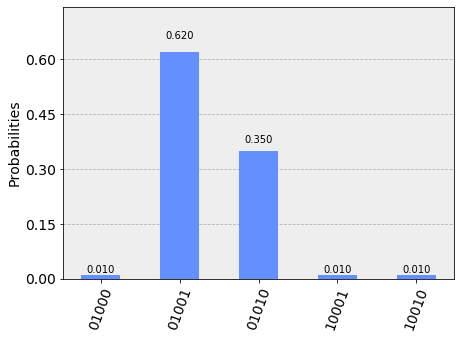

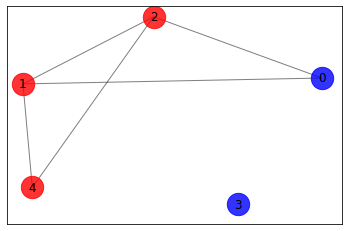

In [23]:
#Code Cell Test - Programmatic VQE without Looping
from qiskit.aqua import aqua_globals
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.variational_forms import RY
from qiskit.aqua import QuantumInstance

penality=1000
qubit_op, offset, penality = clique_new.get_clique_qubitops_2(adjacency_matrix, K, penality)

algo_input = EnergyInput(qubit_op)

print('Penalidade: ', penality)
#aqua_globals.random_seed = 10598
#seed = 10598
optimizer = COBYLA(maxiter=250)
#optimizer = SPSA(max_trials=200)
var_form = RY(qubit_op.num_qubits, depth=5, entanglement='linear')
vqe_clique = VQE(qubit_op, var_form, optimizer)
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend=backend, shots=100) #, seed_simulator=seed)

print("Adjacency Matrix:", adjacency_matrix)
print("Clique(K):", K)

totaltime=0
result = vqe_clique.run(quantum_instance)
x = clique_new.sample_most_likely(len(adjacency_matrix), result['eigvecs'][0])
ising_vqep_sol = clique_new.get_graph_solution(x)
print("ISING:", ising_vqep_sol)
getclique = clique_new.satisfy_or_not(ising_vqep_sol, adjacency_matrix, K)
if np.count_nonzero(ising_vqep_sol) != K:
    getclique = False
totaltime=totaltime+result['eval_time']
#print("Get_Result: ", clique.get_gset_result(x))

print('energy:', result['energy'])
print('time:', totaltime)
print('clique objective:', result['energy'] + offset)
print('optimal_cost:', vqe_clique.get_optimal_cost())
print('Resultado:', result)

#if clique_new.satisfy_or_not(ising_vqep_sol, adjacency_matrix, K):
print("Solution is ", ising_vqep_sol, " for Graph(G) with ", num_nodes, " vertices and a Clique(K): ", K)

#Start lists
ising_vqep_nol1 = []
ising_vqep_nol2 = []
#Create two lists to clique vertice colors
for i in range(num_nodes):
    if ising_vqep_sol[i] != 0:
        ising_vqep_nol1.append(i)
    else:
        ising_vqep_nol2.append(i)

pos=nx.spring_layout(G,k=10,scale=10)
#Red color for clique vertices
nx.draw_networkx_nodes(G,pos,
                       nodelist=ising_vqep_nol1,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#Blue color for not clique vertices
nx.draw_networkx_nodes(G,pos,
                       nodelist=ising_vqep_nol2,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
#Imprimir o grafo com as cliques
nx.draw_networkx_labels(G,pos,with_labels=True)
#else:
#    print("No solution found for K=", K, " para os valores: ", ising_vqep_sol)

counts = result['min_vector']
print (counts)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

#expected_value = (counts['00'] + counts['01'] - counts['10'] - counts['11']) / num_shots
#print('Expected value for sigma_z I is : %s' % expected_value)